In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# STEP 1. Скачайте датасет.

Download the Adult training data set: http://archive.ics.uci.edu/ml/datasets/Adult
(file adult.data)

In [9]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data

"wget" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [8]:
!head adult.data

"head" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


# Step 2. Поймите формат и зачитайте adult.data в переменную df. Используйте cols чтобы дать нормальные названия колонкам.

Обратите внимание на формат!

In [4]:
cols = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'result']

In [70]:
with open("adult.data", 'r') as f:
    df = pd.read_csv(f, names=cols)

In [71]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,result
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Сколько мужчин и женщин?

In [91]:
df.sex.describe()

count     32561
unique        2
top        Male
freq      21790
Name: sex, dtype: object

Male = 21790
Female = 10771

# Средний возраст мужчин и женщин?

In [98]:
df.age[df.sex == ' Male'].describe()['mean'], df.age[df.sex == ' Female'].describe()['mean']

(39.43354749885268, 36.85823043357163)

# Какая доля граждан США (United-States) в данном датасете?

In [105]:
df['native-country'][df['native-country'] == ' United-States'].shape[0] / df.shape[0]

0.895857006848684

# Нарисуйте распределние образования людей (используйте bar plot)

Подпишите график и оси.

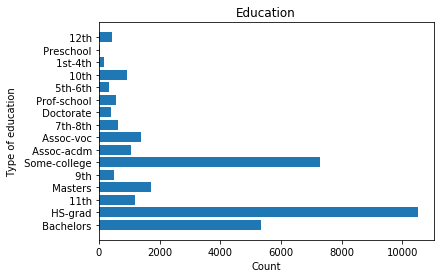

In [152]:
#data

x = df.education.unique()
y = [df.education[df.education == x[i]].count() for i in range(len(x))]

#plot

myplot = plt.subplot()

myplot.barh(x, y, orientation='horizontal', tick_label=x)
myplot.set_title("Education")
myplot.set_xlabel('Count')
myplot.set_ylabel('Type of education')
plt.show()

Горизонтальный тип выбран для лучшей читаемости.

# Какое среднее значние и квадратичное отклонение (std) fnlwgt (”final weight”) разведенных (divorced people) людей. Нарисуйте гистрограмму (Какое распределение оно вам напоминает?)

In [212]:
df.fnlwgt[df['marital-status'] == ' Divorced'].describe()

count    4.443000e+03
mean     1.858028e+05
std      1.056468e+05
min      1.941000e+04
25%      1.155825e+05
50%      1.753700e+05
75%      2.310475e+05
max      1.484705e+06
Name: fnlwgt, dtype: float64

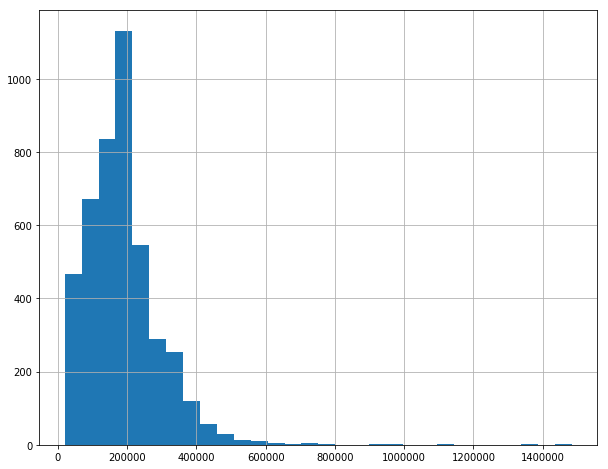

In [241]:
df.fnlwgt[df['marital-status'] == ' Divorced'].hist(bins=30, figsize=(10, 8))

> Ответ: оно мне напоминает распределение Фишера, n1/n2 ~ 0.8

# Правда ли, что большинство людей, из тех кто получает больше 50k, с высшим образованием  (BSc, MSc, PhD - ????)

In [269]:
sum_sum = 0

In [270]:
#Masters count
sum_sum = df.education[df.result == ' >50K'][df.education == ' Masters'].count()

In [271]:
#Bachelors count
sum_sum += df.education[df.result == ' >50K'][df.education == ' Bachelors'].count()

In [272]:
#Doctorate count
sum_sum += df.education[df.result == ' >50K'][df.education == ' Doctorate'].count()

In [275]:
#High-school persentage
sum_sum / df.education[df.result == ' >50K'].count() 
    

0.4445861497258003

> Ответ: Правда / Нет.

нет

# Сколько в среднем работают люди в неделю в зависимости от education?

<BarContainer object of 16 artists>

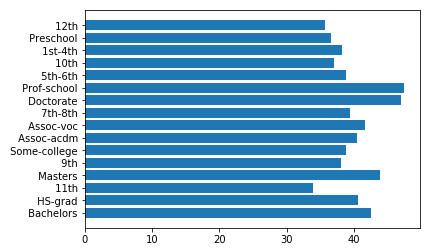

In [291]:
educat = df.education.unique()
hours = [df['hours-per-week'][df.education == educat[tmp]].mean()
         for tmp in range(len(educat))]
plt.barh(educat, hours)

# Кто больше работает в неделю - мужчины или женщины?

In [294]:
df['hours-per-week'][df.sex == " Female"].mean(), df['hours-per-week'][df.sex == " Male"].mean()

(36.410361154953115, 42.42808627810923)

Мужчины

# Кто больше работает в неделю - те кто в отношениях или те кто нет?

In [304]:
df['hours-per-week'][df.relationship == ' Not-in-family'].mean(), df['hours-per-week'][df.relationship != ' Not-in-family'].mean()

(40.595665261890424, 40.38328660949868)

Одиночки работают больше

# Из каких стран люди работают farmers/fishers?

In [317]:
df['native-country'][df.occupation == ' Farming-fishing'].unique()

array([' United-States', ' Cambodia', ' Poland', ' Guatemala', ' Mexico',
       ' England', ' ?', ' Philippines', ' Italy', ' Puerto-Rico',
       ' Vietnam', ' Germany', ' Japan', ' Canada', ' Yugoslavia',
       ' Cuba', ' Portugal', ' El-Salvador', ' Hong', ' Ireland',
       ' France'], dtype=object)

# Сколько максимум работают люди в неделю? Как много таких людей кто работает наибольшее количество часов? Какой у них доход (распечатать)?

In [340]:
df['hours-per-week'].max()

99

In [339]:
df['hours-per-week'][df['hours-per-week'] == 99].count()

85

In [348]:
df.result[df['hours-per-week'] == 99].describe().top

' <=50K'